In [1]:
import numpy as np
import pandas as pd
import twitter
from twitter import Twitter
from twitter import OAuth
from twitter import TwitterHTTPError
from twitter import TwitterStream

In [2]:
# Keys from twitter application for web scrapping
ck ='C3n0EIBkRhpM6EohRja4wBxEH'
cs ='Uu127IPY1R8yQT2klE4WAD4qsK9DKDaahptvSpDOq2gkib9pth'
at ='954075172264431616-v8ldAac4R4XJguYwja6nVhY0zzP25Wi'
ats='5JXnXe3YHD4FC5gC6USU4rtRNsif7Xp6wTarE7uYHF6zP'
# Authentication of the keys
oauth=OAuth(at,ats,ck,cs)
twit_api=Twitter(auth=oauth)
ts= TwitterStream(auth=oauth)

In [4]:
iterator = ts.statuses.filter(track='Star Wars', language='en')
b=[]
for t in iterator:
    b.append(t)
    if len(b)==50:
        break

In [10]:
from pandas.io.json import json_normalize
df = json_normalize(b)
list(df.columns)

['contributors',
 'coordinates',
 'created_at',
 'display_text_range',
 'entities.hashtags',
 'entities.media',
 'entities.symbols',
 'entities.urls',
 'entities.user_mentions',
 'extended_entities.media',
 'extended_tweet.display_text_range',
 'extended_tweet.entities.hashtags',
 'extended_tweet.entities.media',
 'extended_tweet.entities.symbols',
 'extended_tweet.entities.urls',
 'extended_tweet.entities.user_mentions',
 'extended_tweet.extended_entities.media',
 'extended_tweet.full_text',
 'favorite_count',
 'favorited',
 'filter_level',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'place.bounding_box.coordinates',
 'place.bounding_box.type',
 'place.country',
 'place.country_code',
 'place.full_name',
 'place.id',
 'place.name',
 'place.place_type',
 'place.url',
 'possibly_sensitive',
 'quote_count',
 'quoted_status.contribut

In [11]:
df['text']

0     RT @OmanReagan: When someone tells me Sagan wo...
1                     @_icaroline Me chama de star wars
2     RT @JackAllTimeLow: I’m almost 30, single, alo...
3     I am also really proud that my people came tog...
4     RT @HistoryInPix: Cast of Star Wars chillin' i...
5     RT @ABC: A long time ago in an Olympic Games f...
6     RT @OmanReagan: When someone tells me Sagan wo...
7     RT @OmanReagan: When someone tells me Sagan wo...
8     RT @FunkoEurope: RT and follow @funkoeurope to...
9     Disney ruined Star Wars, @EPA ain't protecting...
10        @Vinziiiiii @SWBFUpdates Star Wars fanbase...
11    RT @ffsBlueCafu: Star Wars Soundtrack : Anakin...
12    RT @OmanReagan: When someone tells me Sagan wo...
13    RT @baekzyxing: Back in 2015, after seeing the...
14    @AiG As a fictitious character, he's up there ...
15    RT @alinastarkrov: day 49\n— princess and gene...
16    RT @OmanReagan: When someone tells me Sagan wo...
17    LEGO Star Wars Ewok Village (10236) *Facto

In [14]:
from textblob import TextBlob
tweettext = df['text']
blob = TextBlob(tweettext[0])
list(blob.noun_phrases)

['rt', 'omanreagan', 'sagan', 'war…']

In [15]:
wordlist = pd.DataFrame()
for t in tweettext:
    tx = TextBlob(t)
    l = list(tx.noun_phrases)
    if len(l)!=0:
        wordlist = wordlist.append(l,ignore_index=True)

In [16]:
allword = wordlist.groupby(0).size()
allword

0
# pcnabe                                                     2
... #                                                        1
//t.co/5m7ki4alvc # # ebay                                   1
//t.co/v210ux1ybl… https                                     1
//t.co/v2lukz8psj # hanshotfirst                             1
1977. https                                                  2
2018… https                                                  2
28/02/18 https                                               1
@ _icaroline                                                 1
@ alinastarkrov                                              1
@ bollenator2 @ gokugirl @ _cristian_vlad_ @ igot_c3po @     1
@ business_econ                                              1
@ elyixun                                                    1
@ emiliaclarke @ donaldglover @                              1
@ ffsbluecafu                                                1
@ funkoeurope                                        

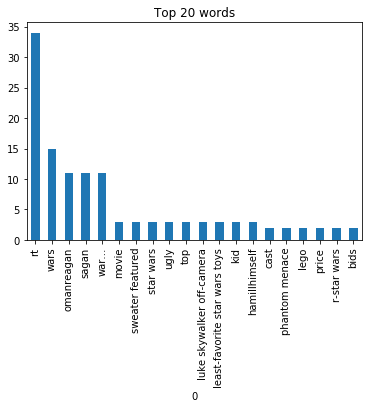

In [18]:
import matplotlib.pyplot as plt
top20allword = allword.sort_values(0,ascending=False).head(20)
top20allword.plot(kind='bar',title='Top 20 words')
plt.show()

In [19]:
wordlist = pd.DataFrame()
for t in tweettext:
    tx = TextBlob(t)
    l = list(tx.words.lemmatize())
    if len(l)!=0:
        wordlist = wordlist.append(l,ignore_index=True)

In [20]:
allword = wordlist.groupby(0).size()
allword

0
's                  5
10236               2
1977                2
2015                1
2016                1
2018…               2
28/02/18            1
285.02              2
2YO                 1
2nd                 1
30                  1
4                   3
44                  2
49                  1
6                   1
9…                  1
A                   5
ABC                 1
ASMR                1
Admiral_Siege       1
AiG                 1
Album               1
Anakin              1
AndrewBartletta     1
As                  1
BB-8                1
Back                1
Bath                1
Betrayal            1
Bids                2
                   ..
wa                  1
wanting             1
war                 5
watch               1
watching            1
weareoneEXO         1
well                1
were                1
where               1
who                 1
will                3
win                 1
with                2
would              11
written 

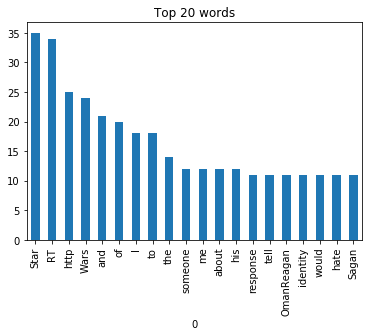

In [22]:
top20allword = allword.sort_values(0,ascending=False).head(20)
top20allword.plot(kind='bar',title='Top 20 words')
plt.show()

In [23]:
wordlist = pd.DataFrame()
for t in tweettext:
    tx = TextBlob(t)
    ww = []
    for word, tag in tx.tags:
        if tag in ('NN', 'NNS', 'NNP', 'NNPS'):
           ww.append(word.lemmatize())
    if len(ww) !=0:
        wordlist = wordlist.append(ww, ignore_index=True)

In [24]:
allword = wordlist.groupby(0).size()

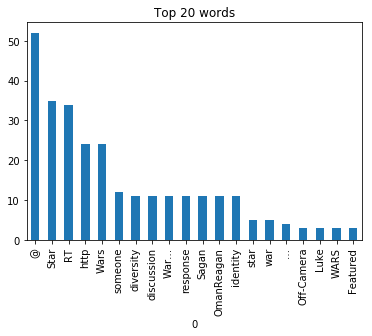

In [26]:
top20allword = allword.sort_values(0,ascending=False).head(20)
top20allword.plot(kind='bar',title='Top 20 words')
plt.show()

In [3]:
iterator = ts.statuses.filter(track = "Bitcoin", language="en")
iterator = ts.statuses.filter(follow=7509582, language="en")

b=[]
for t in iterator:
    b.append(t)
    if len(b)==50:
        break

TwitterHTTPError: Twitter sent status 420 for URL: 1.1/statuses/filter.json using parameters: (follow=7509582&language=en&oauth_consumer_key=C3n0EIBkRhpM6EohRja4wBxEH&oauth_nonce=17670762768593418502&oauth_signature_method=HMAC-SHA1&oauth_timestamp=1519684709&oauth_token=954075172264431616-v8ldAac4R4XJguYwja6nVhY0zzP25Wi&oauth_version=1.0&oauth_signature=y3YVlSHnWjUrPNomGtXtDqAChaQ%3D)
details: Exceeded connection limit for user


In [ ]:
b